<a href="https://colab.research.google.com/github/scottthomaswx/OutlookPlotter/blob/main/CPC_Outlook_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install geopandas
!pip install matplotlib
!pip install metpy
!pip install cartopy
!pip install pandas

import matplotlib.pyplot as plt
import geopandas
from metpy.plots import MapPanel, PanelContainer, PlotGeometry
import pandas as pd
from metpy.plots import USCOUNTIES
import cartopy.feature as cfeat
import cartopy.crs as ccrs

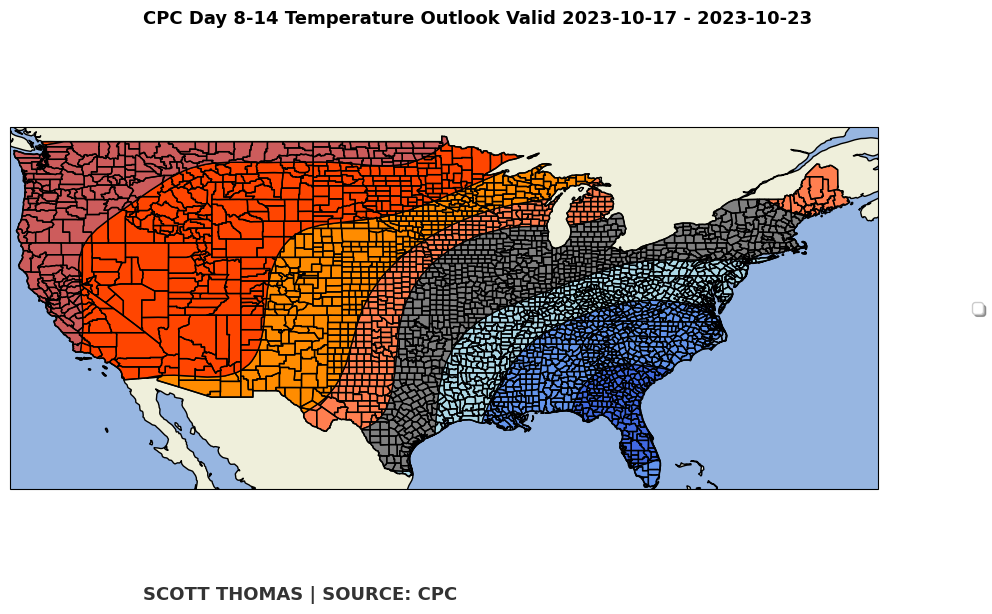

In [ ]:
#Set Variables

day = 'Day 8-14' # @param ["Day 6-10", "Day 8-14", 'Week 3-4"]
variable ='Temperature'  # @param ["Temperature", "Precipitation"]

if day == 'Day 6-10':
  urlday = '610'
if day == 'Day 8-14':
  urlday = '814'
if day == 'Week 3-4':
  urlday = 'wk34'
if variable == 'Precipitation':
  urlvar = 'prcp'
if variable == 'Temperature':
  urlvar = 'temp'

#Pull Data
df = geopandas.read_file('https://ftp.cpc.ncep.noaa.gov/GIS/us_tempprcpfcst/'+urlday+urlvar+'_latest.zip')

#Query Different Categories
Normal = df.query('Cat == "Normal"')
B30 =  df.query('Cat == "Below" and Prob < 40 and Prob >= 33')
B40 =  df.query('Cat == "Below" and Prob < 50 and Prob >= 40')
B50 =  df.query('Cat == "Below" and Prob < 60 and Prob >= 50')
B60 =  df.query('Cat == "Below" and Prob < 70 and Prob >= 60')
B70 =  df.query('Cat == "Below" and Prob < 80 and Prob >= 70')
B80 =  df.query('Cat == "Below" and Prob < 90 and Prob >= 80')
B90 =  df.query('Cat == "Below" and Prob < 100 and Prob >= 90')
A30 =  df.query('Cat == "Above" and Prob < 40 and Prob >= 33')
A40 =  df.query('Cat == "Above" and Prob < 50 and Prob >= 40')
A50 =  df.query('Cat == "Above" and Prob < 60 and Prob >= 50')
A60 =  df.query('Cat == "Above" and Prob < 70 and Prob >= 60')
A70 =  df.query('Cat == "Above" and Prob < 80 and Prob >= 70')
A80 =  df.query('Cat == "Above" and Prob < 90 and Prob >= 80')
A90 =  df.query('Cat == "Above" and Prob < 100 and Prob >= 90')

#Create Figure
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m', edgecolor='black')
ax.add_feature(cfeat.OCEAN.with_scale('50m'))
ax.add_feature(cfeat.LAND.with_scale('50m'))
ax.set_extent([-125, -65, 25, 50], ccrs.PlateCarree())

#Plot Temperature Contours
if variable == 'Temperature':
  B30Geo = ax.add_geometries(B30.geometry, crs = ccrs.PlateCarree(), facecolor =  'lightblue', edgecolor = 'black', zorder = 998)
  B40Geo = ax.add_geometries(B40.geometry, crs = ccrs.PlateCarree(), facecolor =  'cornflowerblue', edgecolor = 'black', zorder = 998, label = '40-50 % Chance Below Normal (Leaning Below)')
  B50Geo = ax.add_geometries(B50.geometry, crs = ccrs.PlateCarree(), facecolor =  'royalblue', edgecolor = 'black', zorder = 998, label = '50-60 % Chance Below Normal (Likely Below)')
  B60Geo = ax.add_geometries(B60.geometry, crs = ccrs.PlateCarree(), facecolor =  'darkblue', edgecolor = 'black', zorder = 998, label = '60-70 % Chance Below Normal (Likely Below)')
  B70Geo = ax.add_geometries(B70.geometry, crs = ccrs.PlateCarree(), facecolor =  'violet', edgecolor = 'black', zorder = 998, label = '70-80 % Chance Below Normal (Likely Below)')
  B80Geo = ax.add_geometries(B80.geometry, crs = ccrs.PlateCarree(), facecolor =  'darkorchid', edgecolor = 'black', zorder = 998, label = '80-90 % Chance Below Normal (Likely Below)')
  B90Geo = ax.add_geometries(B90.geometry, crs = ccrs.PlateCarree(), facecolor =  'purple', edgecolor = 'black', zorder = 998, label = '90-100 % Chance Below Normal (Likely Below)')
  A30Geo = ax.add_geometries(A30.geometry, crs = ccrs.PlateCarree(), facecolor =  'coral', edgecolor = 'black', zorder = 998, label = '33-40 % Chance Above Normal (Leaning Above)')
  A40Geo = ax.add_geometries(A40.geometry, crs = ccrs.PlateCarree(), facecolor =  'darkorange', edgecolor = 'black', zorder = 998, label = '40-50 % Chance Above Normal (Leaning Above)')
  A50Geo = ax.add_geometries(A50.geometry, crs = ccrs.PlateCarree(), facecolor =  'orangered', edgecolor = 'black', zorder = 998, label = '50-60 % Chance Above Normal (Likely Above)')
  A60Geo = ax.add_geometries(A60.geometry, crs = ccrs.PlateCarree(), facecolor =  'indianred', edgecolor = 'black', zorder = 998, label = '60-70 % Chance Above Normal (Likely Above)')
  A70Geo = ax.add_geometries(A70.geometry, crs = ccrs.PlateCarree(), facecolor =  'brown', edgecolor = 'black', zorder = 998, label = '70-80 % Chance Above Normal (Likely Above)')
  A80Geo = ax.add_geometries(A80.geometry, crs = ccrs.PlateCarree(), facecolor =  'red', edgecolor = 'black', zorder = 998, label = '80-90 % Chance Above Normal (Likely Above)')
  A90Geo = ax.add_geometries(A90.geometry, crs = ccrs.PlateCarree(), facecolor =  'darkred', edgecolor = 'black', zorder = 998, label = '90-100 % Chance Above Normal (Likely Above)')
  NormalGeo = ax.add_geometries(Normal.geometry, crs = ccrs.PlateCarree(), facecolor =  'gray', edgecolor = 'black', zorder = 998, label = 'Normal')

  B30Geo.set_label('33-40 % Chance Below Normal (Leaning Below)')
#Plot Precipitation Contours
if variable == 'Precipitation':
  ax.add_geometries(B30.geometry, crs = ccrs.PlateCarree(), facecolor =  'bisque', edgecolor = 'black', zorder = 998, label = '33-40 % Chance Below Normal (Leaning Below)')
  ax.add_geometries(B40.geometry, crs = ccrs.PlateCarree(), facecolor =  'goldenrod', edgecolor = 'black', zorder = 998, label = '40-50 % Chance Below Normal (Leaning Below)')
  ax.add_geometries(B50.geometry, crs = ccrs.PlateCarree(), facecolor =  'darkgoldenrod', edgecolor = 'black', zorder = 998, label = '50-60 % Chance Below Normal (Likely Below)')
  ax.add_geometries(B60.geometry, crs = ccrs.PlateCarree(), facecolor =  'peru', edgecolor = 'black', zorder = 998, label = '60-70 % Chance Below Normal (Likely Below)')
  ax.add_geometries(B70.geometry, crs = ccrs.PlateCarree(), facecolor =  'sienna', edgecolor = 'black', zorder = 998, label = '70-80 % Chance Below Normal (Likely Below)')
  ax.add_geometries(B80.geometry, crs = ccrs.PlateCarree(), facecolor =  'saddlebrown', edgecolor = 'black', zorder = 998, label = '80-90 % Chance Below Normal (Likely Below)')
  ax.add_geometries(B90.geometry, crs = ccrs.PlateCarree(), facecolor =  'maroon', edgecolor = 'black', zorder = 998, label = '90-100 % Chance Below Normal (Likely Below)')
  ax.add_geometries(A30.geometry, crs = ccrs.PlateCarree(), facecolor =  'palegreen', edgecolor = 'black', zorder = 998, label = '33-40 % Chance Above Normal (Leaning Above)')
  ax.add_geometries(A40.geometry, crs = ccrs.PlateCarree(), facecolor =  'yelowgreen', edgecolor = 'black', zorder = 998, label = '40-50 % Chance Above Normal (Leaning Above)')
  ax.add_geometries(A50.geometry, crs = ccrs.PlateCarree(), facecolor =  'limegreen', edgecolor = 'black', zorder = 998, label = '50-60 % Chance Above Normal (Likely Above)')
  ax.add_geometries(A60.geometry, crs = ccrs.PlateCarree(), facecolor =  'green', edgecolor = 'black', zorder = 998, label = '60-70 % Chance Above Normal (Likely Above)')
  ax.add_geometries(A70.geometry, crs = ccrs.PlateCarree(), facecolor =  'forestgreen', edgecolor = 'black', zorder = 998, label = '70-80 % Chance Above Normal (Likely Above)')
  ax.add_geometries(A80.geometry, crs = ccrs.PlateCarree(), facecolor =  'seagreen', edgecolor = 'black', zorder = 998, label = '80-90 % Chance Below Normal (Likely Above)')
  ax.add_geometries(A90.geometry, crs = ccrs.PlateCarree(), facecolor =  'darkgreen', edgecolor = 'black', zorder = 998, label = '90-100 % Chance Above Normal (Likely Above)')
  ax.add_geometries(Normal.geometry, crs = ccrs.PlateCarree(), facecolor =  'gray', edgecolor = 'black', zorder = 998,  label = 'Normal')

ax.add_feature(USCOUNTIES, facecolor='None', edgecolor='black', zorder=998)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box .height])
ax.legend(loc='center left', bbox_to_anchor=(1.10, 0.5),
    ncol=1, fancybox=True, shadow=True)

plt.figtext(0.22, 0.85, f'CPC {day} {variable} Outlook Valid {df.Start_Date[0]} - {df.End_Date[0]} ', ha='left', weight='bold', fontsize=13)
plt.figtext(0.22, 0.13, f'SCOTT THOMAS | SOURCE: CPC', weight='bold', color='black', fontsize=13, ha='left', alpha=0.8)

plt.show()
